In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
evictions_data = pd.read_csv('documents/datasets/train_labels.csv')
evictions_data_values = pd.read_csv('documents/datasets/train_values.csv')


In [7]:
print(evictions_data.columns)
print(evictions_data_values.columns)

Index(['row_id', 'evictions'], dtype='object')
Index(['row_id', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and

In [8]:
evictions_data.head()
evictions_data_values.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,1960.0,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,890.0,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,3509.0,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,2219.0,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,3410.0,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877


In [9]:
evictions_data.dtypes
evictions_data_values.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

In [10]:
evictions_data.describe()
evictions_data_values.describe()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
count,2546.000000,2.546000e+03,2546.000000,2546.00000,2546.000000,2544.000000,2544.000000,2546.000000,2546.000000,2546.000000,...,2371.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000
mean,1272.500000,1.062459e+05,15008.009034,28.14739,688.838178,46050.601415,129609.579009,28.520561,0.776272,0.089774,...,2587.696752,0.499126,0.226179,0.171583,0.147891,0.353198,0.300911,0.198000,11.481923,10.407134
std,735.111216,3.228520e+05,53333.684235,7.94014,183.722492,11584.627249,76236.606321,4.453165,0.201149,0.145550,...,2216.147338,0.024247,0.032725,0.041928,0.068077,0.070167,0.051811,0.086415,2.565979,2.720135
min,0.000000,1.160000e+02,14.000000,7.30500,336.000000,19328.000000,32287.000000,9.986000,0.050935,0.000000,...,189.000000,0.285000,0.088000,0.063000,0.016032,0.127127,0.137000,0.018868,3.612183,0.000000
25%,636.250000,1.029350e+04,1052.000000,22.88400,577.250000,38495.500000,85288.250000,26.047250,0.655224,0.005669,...,1409.000000,0.495000,0.206000,0.144000,0.097000,0.308732,0.265734,0.138146,9.915292,8.558383
50%,1272.500000,2.386300e+04,2580.500000,26.86600,642.000000,44480.000000,108844.000000,28.780000,0.855478,0.021864,...,1980.000000,0.504000,0.225000,0.168000,0.130869,0.356574,0.301301,0.176677,11.306037,10.478088
75%,1908.750000,6.796875e+04,8098.750000,32.09275,750.000000,51526.000000,151696.250000,31.160500,0.935331,0.094011,...,2864.500000,0.511000,0.243750,0.194750,0.194410,0.401405,0.336000,0.232908,12.836254,12.159568
max,2545.000000,5.279852e+06,882101.000000,70.61000,1728.000000,123452.000000,904937.000000,49.535000,0.995114,0.858997,...,23399.000000,0.572000,0.359000,0.345000,0.465932,0.550349,0.448692,0.584080,28.922868,27.397260


In [11]:
def count_unique(evictions_data_values, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(evictions_data_values[col].value_counts())

cat_cols = ['county_code', 'year', 'state', 'rucc', 'urban_influence', 
            'economic_typology']
count_unique(evictions_data_values, cat_cols)


For column county_code
5e9d28b    2
a887a8d    2
29ace89    2
bb4efbb    2
65ddbb3    2
4f6bb21    2
be0b559    2
be63f87    2
b846209    2
b35961d    2
a23a239    2
f132983    2
6be3f25    2
a29efc7    2
31e4dcb    2
3ebf195    2
b0ea1f7    2
80fd397    2
599df8f    2
9dc2373    2
f06cd75    2
f1e531f    2
aa1e37f    2
a57acdd    2
4cb66e5    2
d91295b    2
24859e1    2
778d50d    2
9bed243    2
a227129    2
          ..
cd5a01b    1
86cf7dd    1
99b35d3    1
7db8d31    1
2ae1091    1
345996f    1
d1226a7    1
5c10663    1
dea3ec3    1
9c81ee3    1
e8c0241    1
8a85e77    1
aea223f    1
bf9e47b    1
179566d    1
ed75a8d    1
1ab900d    1
54a3d25    1
1c29edd    1
083865f    1
a4f5439    1
2285e95    1
ce04b77    1
a8c73bb    1
4e60593    1
e5acf8b    1
b316e91    1
045b935    1
23297bd    1
821a955    1
Name: county_code, Length: 1296, dtype: int64

For column year
b    1279
a    1267
Name: year, dtype: int64

For column state
930f257    228
dc52510    137
9759812    123
f93b51e    1

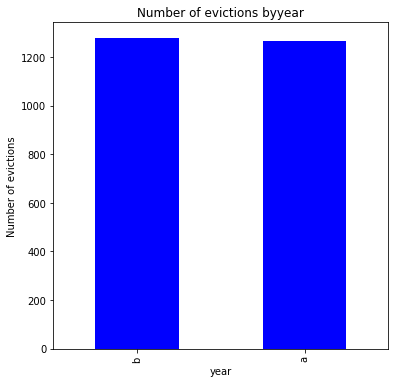

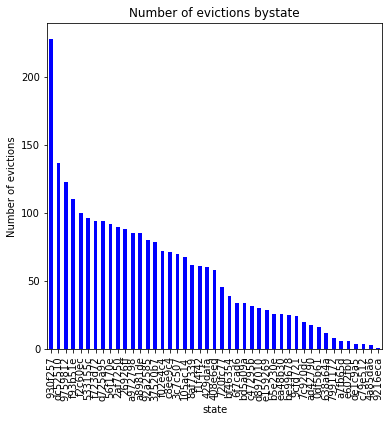

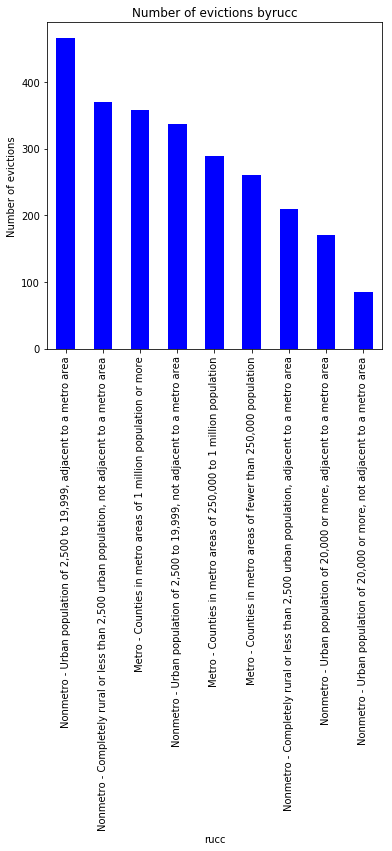

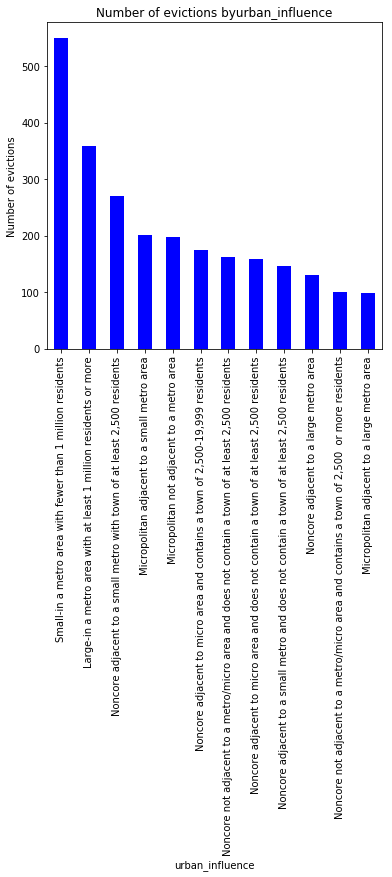

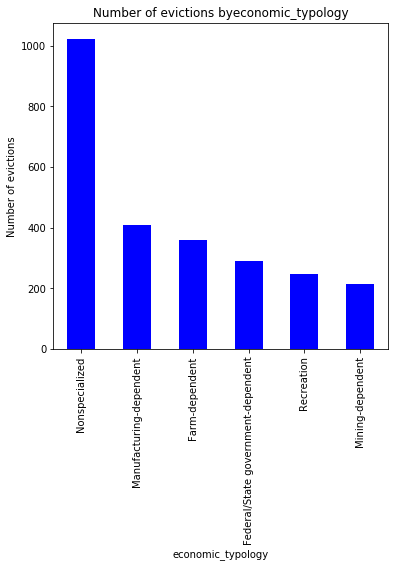

In [12]:
def plot_bars(evictions_data_values, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = evictions_data_values[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of evictions by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of evictions')# Set text for y axis
        plt.show()

plot_cols = ['year', 'state', 'rucc', 'urban_influence', 
            'economic_typology']
plot_bars(evictions_data_values, plot_cols)    

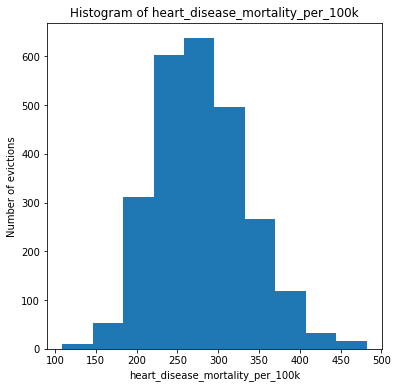

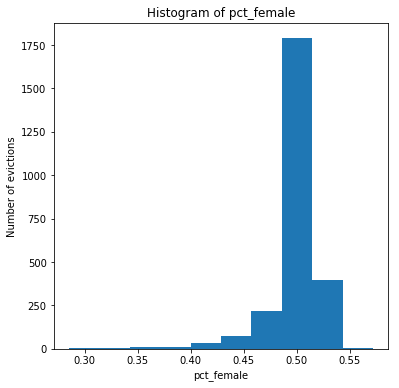

In [13]:
def plot_histogram(evictions_data_values, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        evictions_data_values[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of evictions')# Set text for y axis
        plt.show()
        
num_cols = ['heart_disease_mortality_per_100k', 'pct_female']    
plot_histogram(evictions_data_values, num_cols)

C:\Users\Renate\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


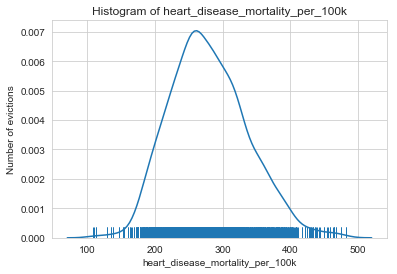

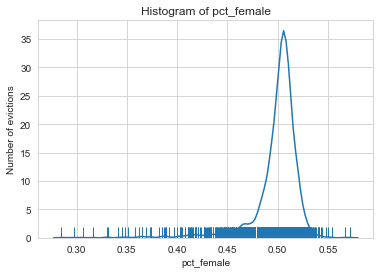

In [14]:
def plot_density_hist(evictions_data_values, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(evictions_data_values[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of evictions')# Set text for y axis
        plt.show()
        
plot_density_hist(evictions_data_values, num_cols)    

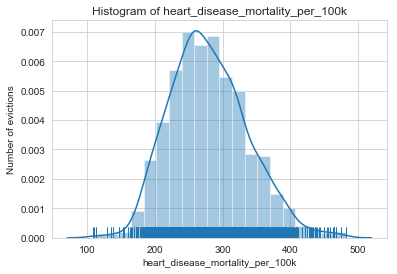

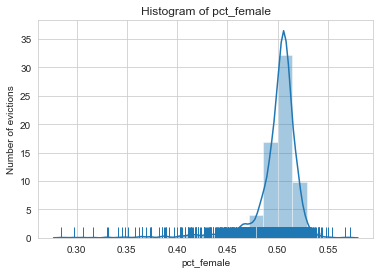

In [15]:
plot_density_hist(evictions_data_values, num_cols, bins = 20, hist = True)        

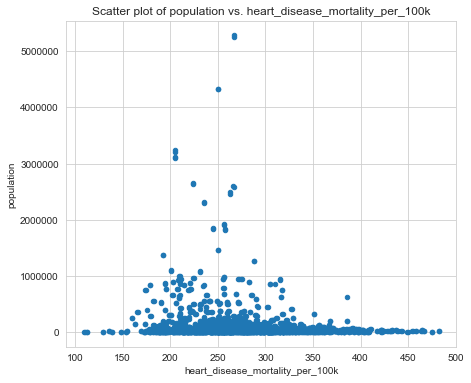

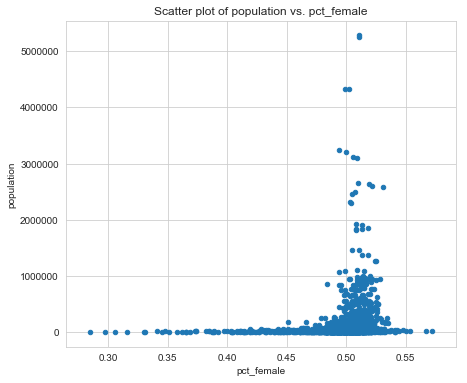

In [18]:
def plot_scatter(evictions_data_values, cols, col_y = 'population'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        evictions_data_values.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['heart_disease_mortality_per_100k', 'pct_female'] 
plot_scatter(evictions_data_values, num_cols)        

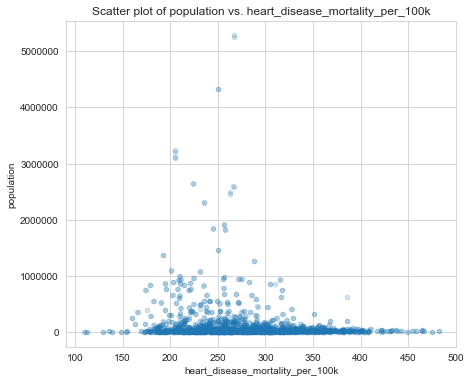

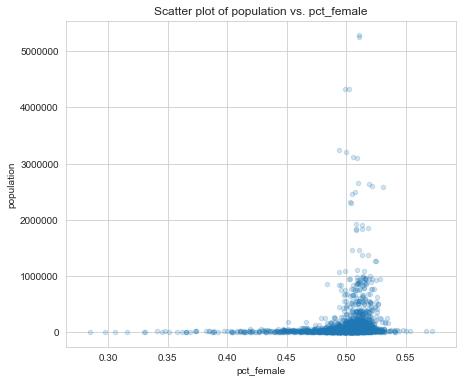

In [19]:
def plot_scatter_t(evictions_data_values, cols, col_y = 'population', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        evictions_data_values.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(evictions_data_values, num_cols, alpha = 0.2)        

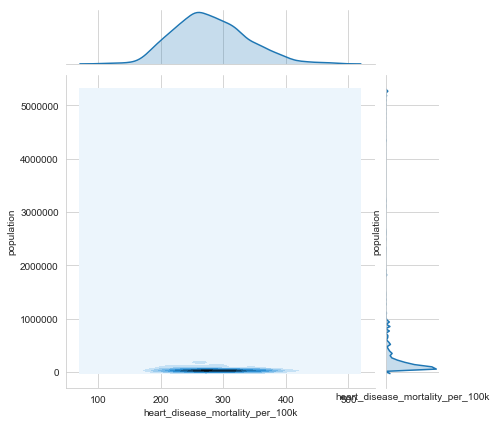

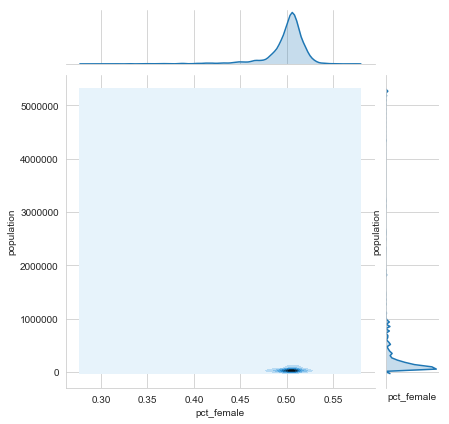

In [20]:
def plot_desity_2d(evictions_data_values, cols, col_y = 'population', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=evictions_data_values, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(evictions_data_values, num_cols)     

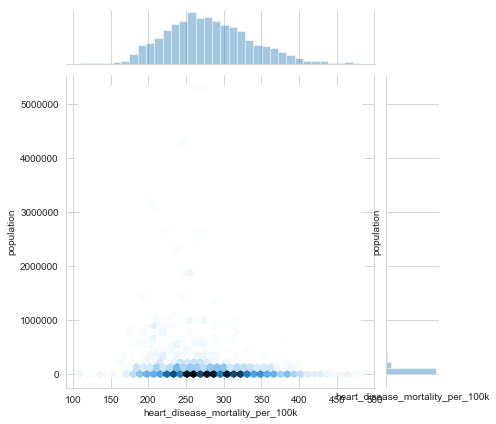

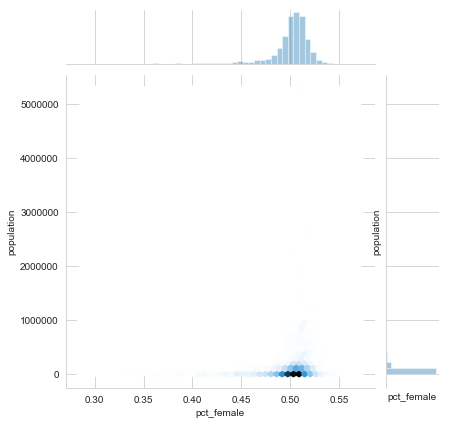

In [21]:
plot_desity_2d(evictions_data_values, num_cols, kind = 'hex')

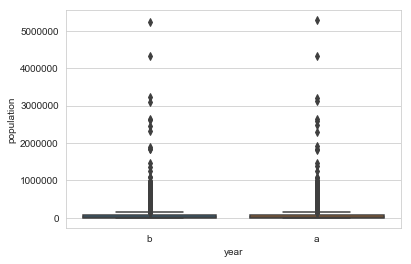

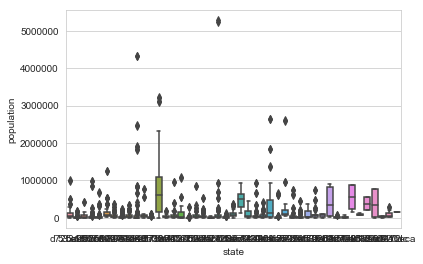

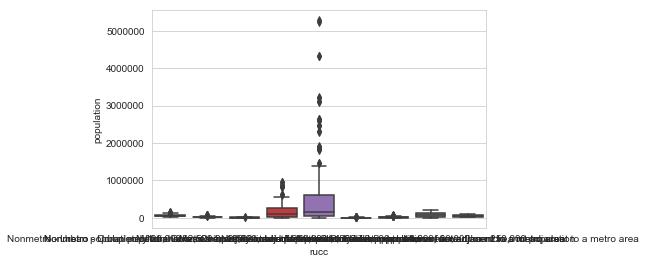

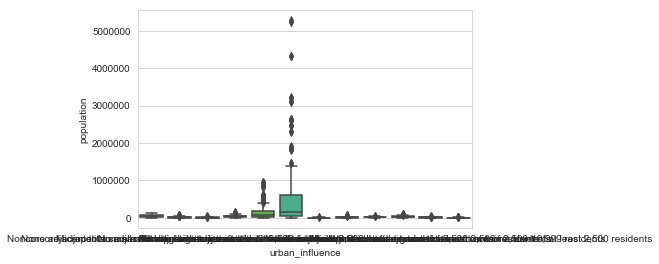

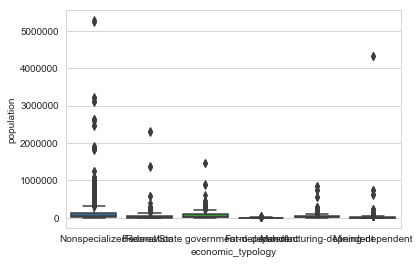

In [22]:
def plot_box(evictions_data_values, cols, col_y = 'population'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=evictions_data_values)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['year', 'state', 'rucc', 'urban_influence', 
            'economic_typology']
plot_box(evictions_data_values, cat_cols)   

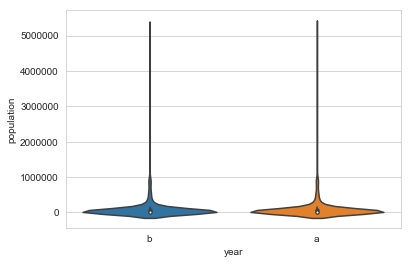

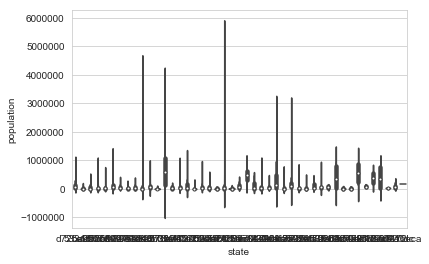

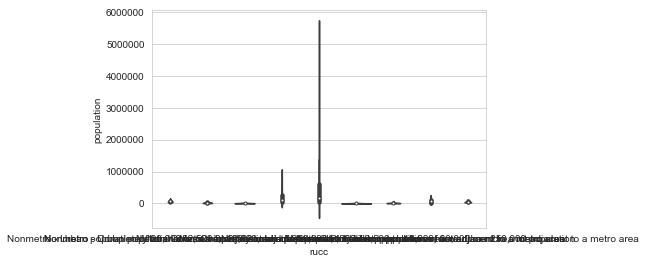

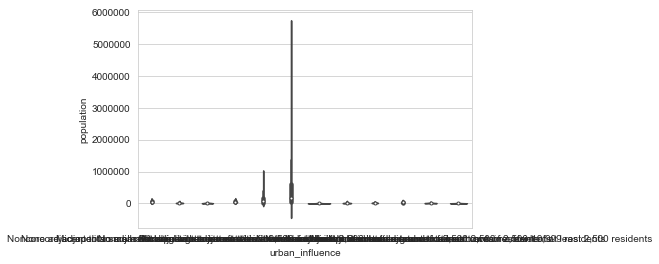

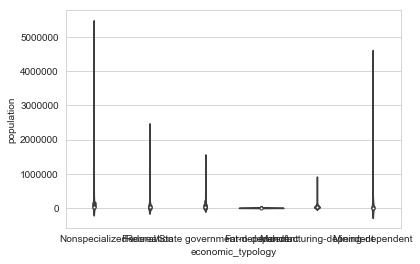

In [23]:
def plot_violin(evictions_data_values, cols, col_y = 'population'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=evictions_data_values)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(evictions_data_values, cat_cols)  

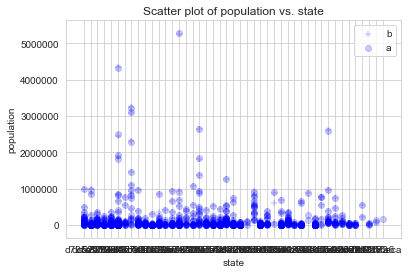

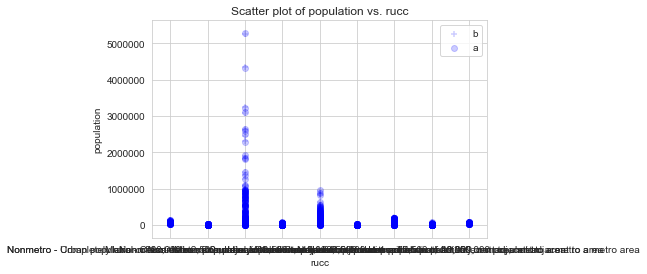

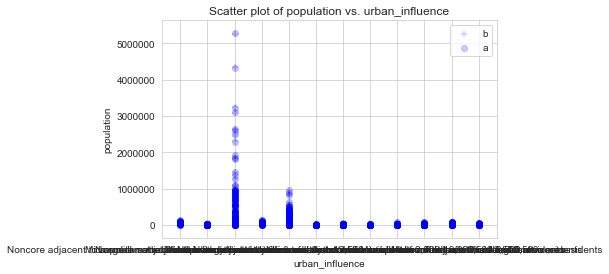

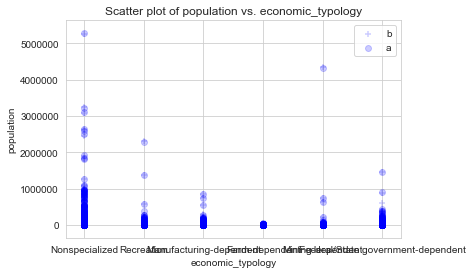

In [24]:
def plot_scatter_shape(evictions_data_values, cols, shape_col = 'year', col_y = 'population', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = evictions_data_values[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = evictions_data_values[evictions_data_values[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['state', 'rucc', 'urban_influence', 
            'economic_typology']
plot_scatter_shape(evictions_data_values, num_cols)                

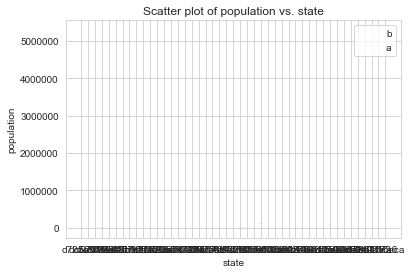

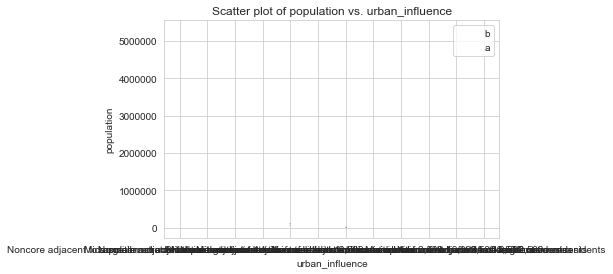

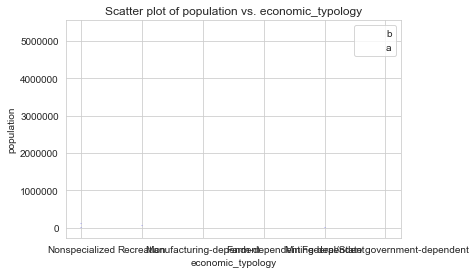

In [27]:
def plot_scatter_size(evictions_data_values, cols, shape_col = 'year', size_col = 'pct_female',
                            size_mul = 0.000025, col_y = 'population', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = evictions_data_values[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = evictions_data_values[evictions_data_values[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha, "s":size_mul*evictions_data_values[size_col]**2}, 
                        fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['state', 'urban_influence', 
            'economic_typology']
plot_scatter_size(evictions_data_values, num_cols)  

C:\Users\Renate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


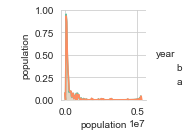

In [30]:
num_cols = ['state', 'rucc', 'urban_influence', 
            'economic_typology', 'population', 'year'] 
sns.pairplot(evictions_data_values[num_cols], hue='year', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")